<h1>Surf's Up: Advanced Data Storage & Retrieval</h1>

In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

<p>These lines use SQLalchemy to convert the .sqlite database file into a format that python can use.</br>
<strong>create_engine</strong> makes what SQLalchemy documentation describes as the <em>starting point</em> for a db</br> 
<strong>automap_base</strong> makes the engine into classes</br>
<strong>ORM Session</strong> maps the classes into a useable format for python</br>
<strong>.keys</strong> looks at the class(es) and returns the table names</br>

In [2]:
surf_engine = create_engine("sqlite:///Resources/hawaii.sqlite")
surf_base = automap_base()
surf_base.prepare(surf_engine, reflect=True)
surf_base.classes.keys()

['measurement', 'station']

<strong>.classes</strong> makes <em>references</em> for the two original tables</br>
<strong>Session</strong> is a <em>holding zone</em> for the queries to be run</br>

In [3]:
Measurement = surf_base.classes.measurement
Station = surf_base.classes.station
Surf_ORM_Session = Session(surf_engine)

Here I use <strong>Pandas</strong> to read the .sqlite tables and perform queries and return as a datframe

In [4]:
import pandas as pd

xx = surf_engine.connect()
yy = pd.read_sql("SELECT * FROM measurement",xx)
yy.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


From nine stations we have daily measurements over a period of 7+ years

In [5]:
len(yy)

19550

Sorting by date, i return a dataframe in descending order to see the last day of measurement

In [6]:
yy.sort_values(by='date', ascending=False).head()

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


</br></br></br>
<strong>inspect</strong> is used to return information about the .sql tables in json form

In [7]:
zz = inspect(xx)
zz.get_table_names() 

['measurement', 'station']

In [8]:
zz.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

</br></br></br>

This is the table of the nine weather stations, each with  location and elevation

In [10]:
xxx = surf_engine.connect()
ee = "SELECT * FROM station"
yyy = pd.read_sql(ee,xxx)
yyy

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
zz = inspect(xx)
zz.get_table_names() 

['measurement', 'station']

In [13]:
zz.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

</br></br></br>
##### Here is a query that selects the readings for only the table's most recent year, reduces the table to just date and precip, and makes a dataframe

In [40]:
aa = "SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
LIMIT 10 ;"

surf_engine.execute(aa).fetchall()

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0)]

In [41]:
bb = "SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23';"
xxxx = surf_engine.connect()
dddd = pd.read_sql(bb,xxxx)
dddd.head()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


In [43]:
cc = "SELECT measurement.date, measurement.prcp \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
LIMIT 10 ;"

surf_engine.execute(cc).fetchall()

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0)]

In [45]:
dd = "SELECT measurement.date, measurement.prcp \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
 ;"

xxxx = surf_engine.connect()
OneYearPrecip = pd.read_sql(dd,xxxx)
OneYearPrecip.set_index("date",inplace=True)
OneYearPrecip.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


</br></br>
<h4>Precipitation Chart</h4>
For the charts most recent year, August 24, 2016 - August 23, 2017, here is the amount of rainfall in inches 

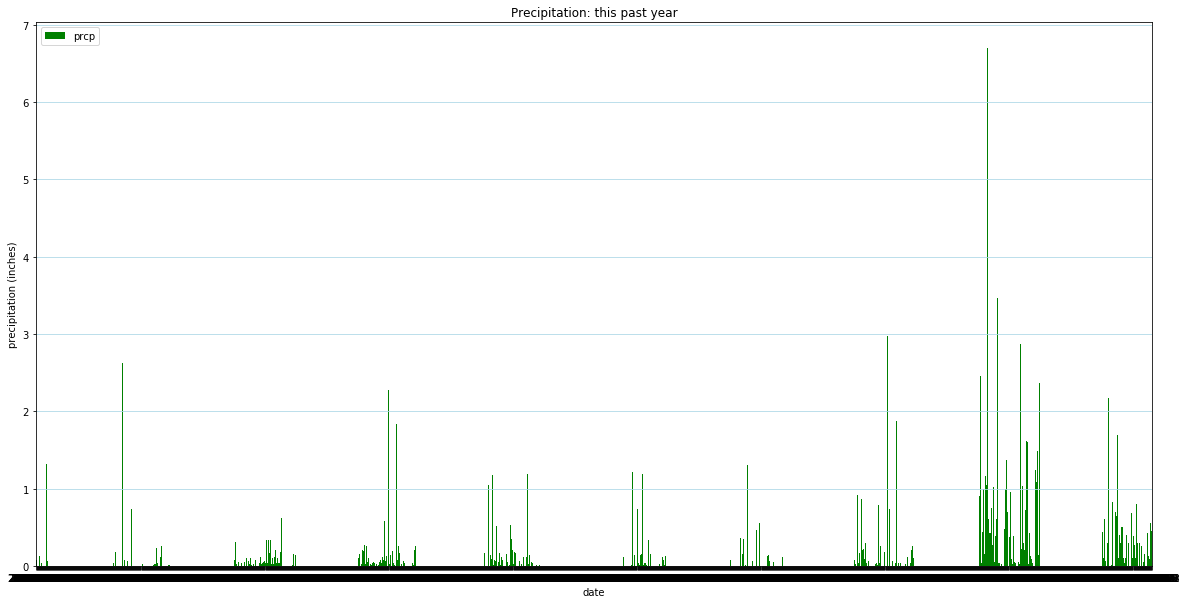

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#Bar chart of Average Salary by Title
OneYearPrecip.plot(kind="bar", figsize=(20,10),rot=0,facecolor="green", alpha=1,)
plt.legend(loc=2)
plt.grid(axis="y",color="lightblue")
plt.title("Precipitation: this past year")
plt.xlabel("date")
plt.ylabel("precipitation (inches)")
plt.show()